In [1]:
import json
from dataclasses import field

import geojson
from geojson import FeatureCollection

import emerge.core.objects
from emerge import fs
import geopandas as gp


@emerge.dataclass
class Farm(emerge.core.objects.EmergeFile):
    _shape: FeatureCollection = field(init=False, repr=False, default=None)
    crs: str = "EPSG:4326"

    @property
    def shape(self) -> FeatureCollection:
        return geojson.loads(json.dumps(self._shape))

    @shape.setter
    def shape(self, value: FeatureCollection) -> None:
        self._shape = json.loads(geojson.dumps(value))

    @property
    def geo(self):
        gdf = gp.GeoDataFrame.from_features(self._shape['features'])
        gdf.crs = self.crs
        return gdf

    def centroid(self):
        farm_gd = self.geo
        return farm_gd.to_crs(3857).centroid

In [3]:
with open("data/shape/parcel1.geojson", "r") as file:
    farm1 = Farm(id="farm1", name="farmOne", path="/farms")
    farm1.shape = geojson.loads(file.read())

In [4]:
print("CENTROID", farm1.centroid())

CENTROID 0    POINT (-8698743.059 4641708.095)
dtype: geometry


/home/darren/PycharmProjects/emerge/venv/lib/python3.10/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/darren/PycharmProjects/emerge/venv/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


<Axes: >

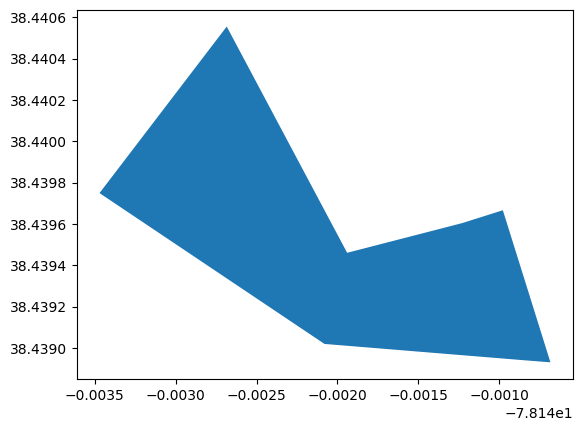

In [8]:
farm1.geo.plot()

In [9]:
with open("data/shape/parcel2.geojson", "r") as file:
    farm2 = Farm(id="farm2", name="farmTwo", path="/farms")
    farm2.shape = geojson.loads(file.read())

In [10]:
more_land = gp.pd.concat([farm1.geo, farm2.geo])
more_land.crs = "EPSG:4326"
print(more_land)
print("CENTROID", more_land.to_crs(3857).centroid)

                                            geometry  ...    Shapelen
0  MULTIPOLYGON (((-78.14098 38.43967, -78.14068 ...  ...  883.195736
0  MULTIPOLYGON (((-78.14172 38.44146, -78.14156 ...  ...  736.670773

[2 rows x 10 columns]
CENTROID 0    POINT (-8698743.059 4641708.095)
0    POINT (-8698707.762 4641821.283)
dtype: geometry


<Axes: >

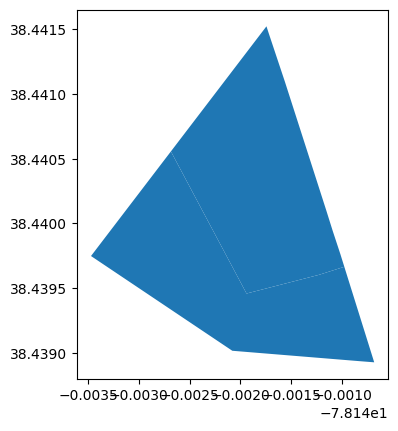

In [12]:
more_land.plot()

In [13]:
print(farm1,farm2)

{"id": "farm1", "data": "", "date": "Mar 19 2023 09:59:22", "name": "farmOne", "path": "/farms", "perms": "rwxrwxrwx", "type": "file", "uuid": "", "node": "", "version": 0, "_shape": {"type": "FeatureCollection", "name": "DarrenFarm", "crs": {"type": "name", "properties": {"name": "urn:ogc:def:crs:OGC:1.3:CRS84"}}, "features": [{"type": "Feature", "geometry": {"type": "MultiPolygon", "coordinates": [[[[-78.140978, 38.439666], [-78.140684, 38.43893], [-78.140831, 38.438939], [-78.14208, 38.439019], [-78.142933, 38.439467], [-78.14347, 38.439749], [-78.142684, 38.440555], [-78.14194, 38.43946], [-78.141228, 38.439604], [-78.140978, 38.439666]]]]}, "properties": {"OBJECTID": 3175565, "VGIN_QPID": 5111300009436, "FIPS": "51113", "LOCALITY": "Madison County", "PARCELID": "33        10L3310L", "PTM_ID": "33        10L3310L", "LASTUPDATE": "2022-03-07", "Shapearea": 28188.864966685, "Shapelen": 883.1957360885991}}]}, "crs": "EPSG:4326"} {"id": "farm2", "data": "", "date": "Mar 19 2023 09:59:2

In [17]:
import json
print(json.dumps(json.loads(str(farm1)), indent=4))

{
    "id": "farm1",
    "data": "",
    "date": "Mar 19 2023 09:59:22",
    "name": "farmOne",
    "path": "/farms",
    "perms": "rwxrwxrwx",
    "type": "file",
    "uuid": "",
    "node": "",
    "version": 0,
    "_shape": {
        "type": "FeatureCollection",
        "name": "DarrenFarm",
        "crs": {
            "type": "name",
            "properties": {
                "name": "urn:ogc:def:crs:OGC:1.3:CRS84"
            }
        },
        "features": [
            {
                "type": "Feature",
                "geometry": {
                    "type": "MultiPolygon",
                    "coordinates": [
                        [
                            [
                                [
                                    -78.140978,
                                    38.439666
                                ],
                                [
                                    -78.140684,
                                    38.43893
                     